<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/fruits1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [7]:
path = Path("/content//sample_data")
print(path)
for file, folder in [('apple.csv', 'apple'), ('pom.csv', 'pomm')]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest)

/content/sample_data


In [8]:
for folder in ('apple', 'pomm'):
    print(folder)
    verify_images(path/folder, delete=True, max_size=500)

apple


pomm


In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [11]:
data.classes

['apple', 'pomm']

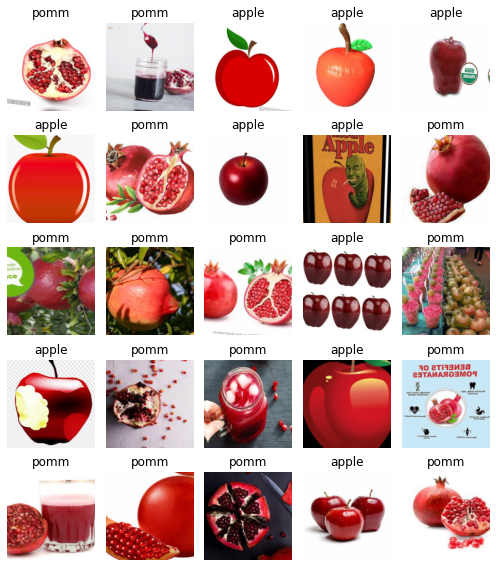

In [42]:
data.show_batch(rows=5, figsize=(7, 8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

In [46]:
(['apple', 'pomm'], 2, 214, 53)

(['apple', 'pomm'], 2, 214, 53)

In [47]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [48]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.899039,0.316110,0.140625,0.859375,00:05
1,0.573117,0.480928,0.132812,0.867188,00:05
2,0.405953,0.494189,0.132812,0.867188,00:05
3,0.322317,0.467519,0.101562,0.898438,00:05
4,0.266891,0.452883,0.109375,0.890625,00:05


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [0]:
losses,idxs = interp.top_losses()

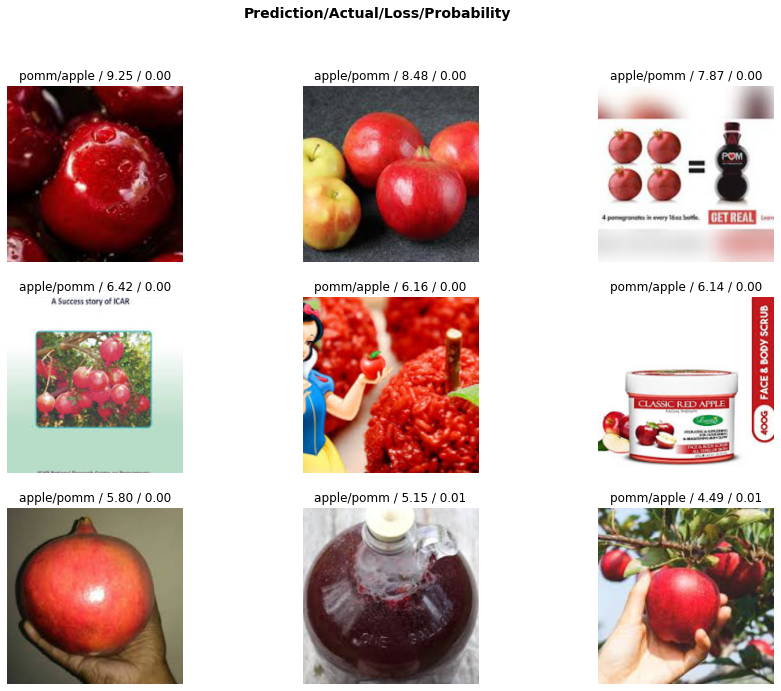

In [51]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
from fastai.widgets import *

In [53]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

In [0]:
img = open_image('/content/sample_data/test.jpeg')

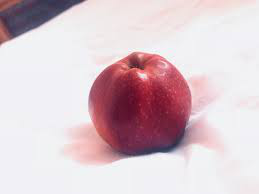

In [61]:
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)

In [64]:
pred_class

Category tensor(0)